In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [66]:
df = pd.read_csv('./datasets/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [67]:
df["Type"].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [68]:
X = df.drop("Type", axis=1)
y = df["Type"]

In [69]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [70]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [71]:
sse = []
for k in range(1,8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    sse.append(km.inertia_)

C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Wi

In [72]:
sse

[1342.7570466443028,
 820.0278544371247,
 726.974440523848,
 498.24059628946037,
 402.072995863509,
 336.29263337746863,
 292.84230717549116]

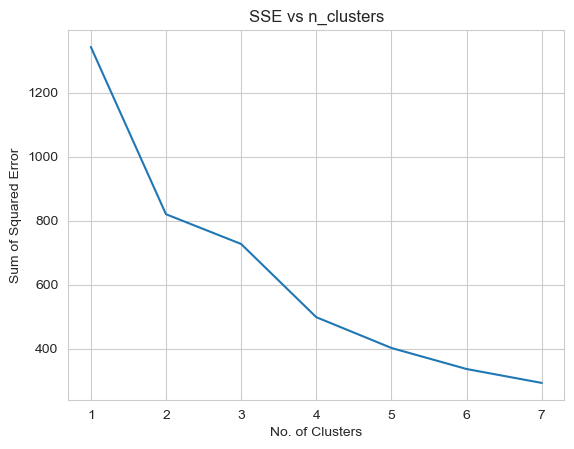

In [73]:
plt.plot(range(1,8), sse)
plt.xlabel("No. of Clusters")
plt.ylabel("Sum of Squared Error")
plt.title("SSE vs n_clusters")
plt.grid(True)
plt.show()

In [74]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=7, random_state=42)

In [75]:
kmeans.cluster_centers_

array([[1.51493200e+00, 1.42260000e+01, 3.18000000e+00, 2.27000000e+00,
        7.16200000e+01, 1.23200000e+00, 6.30600000e+00, 1.00400000e+00,
        2.40000000e-02],
       [1.51630385e+00, 1.46746154e+01, 1.65384615e-01, 2.12923077e+00,
        7.33138462e+01, 7.07692308e-02, 8.58038462e+00, 9.86923077e-01,
        1.50000000e-02],
       [1.52133444e+00, 1.38855556e+01, 3.34361111e+00, 1.04916667e+00,
        7.17955556e+01, 1.96944444e-01, 9.53027778e+00, 7.63888889e-02,
        4.91666667e-02],
       [1.52013529e+00, 1.31335294e+01, 5.72941176e-01, 1.48647059e+00,
        7.30682353e+01, 5.01764706e-01, 1.10052941e+01, 1.41176471e-02,
        6.17647059e-02],
       [1.51733107e+00, 1.30939669e+01, 3.50561983e+00, 1.36256198e+00,
        7.28376033e+01, 5.66694215e-01, 8.41231405e+00, 5.28925620e-03,
        6.53719008e-02],
       [1.52826714e+00, 1.18671429e+01, 0.00000000e+00, 1.21857143e+00,
        7.16728571e+01, 2.51428571e-01, 1.43157143e+01, 4.50000000e-01,
        1.3

In [76]:
pred = kmeans.fit_predict(X)
pred

C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 5, 5, 5, 3, 3,
       5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 3, 3, 5,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4,
       4, 4, 4, 2, 4, 2, 4, 4, 2, 0, 3, 3, 3, 3, 3, 3, 3, 6, 6, 3, 3, 3,
       2, 2, 2, 2, 1, 1, 3, 3, 1, 0, 0, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])